# Exploring Correlation between Number of Syllables and Age of Acquisition

Heather Fryling 6/14/2021

This is a simple exploration of age of acquisition vs number of syllables in words based upon a combined database found here: http://crr.ugent.be/archives/806.
I wanted to know if there was correlation between number of syllables and age of acquisition, or if the two variables are independent. If the two are correlated, one can be a proxy for the other. If they are not correlated, they are telling us two different things, and it may be useful to consider both when measuring lexical simplicity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import polynomial

In [2]:
df = pd.read_csv('AoA_51715_words.csv')

In [3]:
df.head()

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
0,a,a,20415.27,Article,1,1,1,a,2.89,1.00,2.89,1.00,3.16,NaN,NaN,NaN
1,aardvark,aardvark,0.41,Noun,8,7,2,aardvark,9.89,1.00,9.89,1.00,NaN,NaN,NaN,NaN
2,abacus,abacus,0.24,Noun,6,6,3,abacus,8.69,0.65,8.69,0.65,NaN,NaN,NaN,NaN
3,abacuses,abacuses,0.02,Noun,8,9,4,abacus,NaN,NaN,8.69,0.65,NaN,NaN,NaN,NaN
4,abalone,abalone,0.51,Verb,7,7,4,abalone,12.23,0.72,12.23,0.72,NaN,NaN,NaN,NaN


In [4]:
# Removing rows where the age of acquisition is not a number.
df = df.loc[df['AoA_Kup_lem'] == df['AoA_Kup_lem']]

In [5]:
# We can see that 30 words did not have age of acquisition listed.
num_syllables = df['Nsyll']
len(num_syllables)

51695

In [6]:
aoa = df['AoA_Kup_lem']

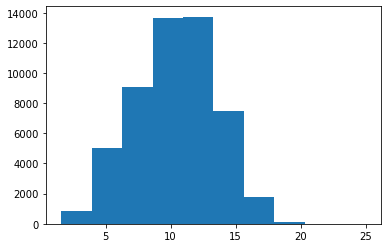

In [7]:
# Age of acquisition is roughly normal.
plt.hist(aoa);

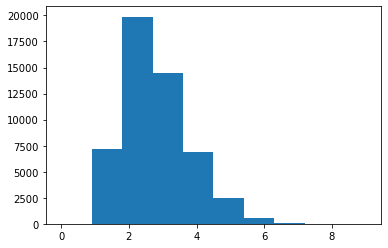

In [8]:
# Number of syllables is skewed right but roughly normal.
plt.hist(num_syllables);

### It looks like three-syllable words have the greatest variability in when they're acquired.

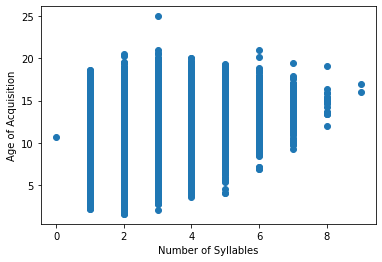

In [9]:
plt.xlabel("Number of Syllables")
plt.ylabel("Age of Acquisition")
plt.scatter(num_syllables, aoa,);

### The linear regression line does not fit the data well at all.

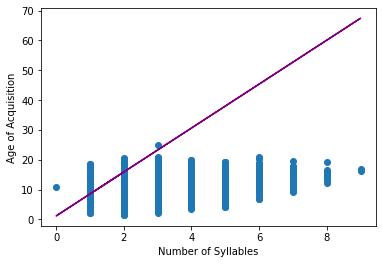

In [10]:
plt.xlabel("Number of Syllables")
plt.ylabel("Age of Acquisition")
plt.scatter(num_syllables, aoa,);
m, b = polynomial.polynomial.polyfit(num_syllables, aoa, 1)
plt.plot(num_syllables, m*num_syllables + b, color="purple");

### The correlation also coeffecient also looks weak.

In [11]:
np.corrcoef(num_syllables, aoa)

array([[1.        , 0.41413747],
       [0.41413747, 1.        ]])

I would conclude that there is some relationship between number of syllables and age of acquisition but that both tell us different things and therefore both may have some utility in predicting lexical complexity.

### Let's look at the distributions of when words of various num_syllables are learned.

In [14]:
# Grabbing the words with three syllables.
three_syllables = df.loc[df['Nsyll'] == 3]
three_syllables.head()

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
2,abacus,abacus,0.24,Noun,6,6,3,abacus,8.69,0.65,8.69,0.65,NaN,NaN,NaN,NaN
5,abalones,abalones,0.12,Noun,8,7,3,abalone,NaN,NaN,12.23,0.72,NaN,NaN,NaN,NaN
6,abandon,abandon,8.10,Verb,7,7,3,abandon,8.32,1.00,8.32,1.00,NaN,NaN,NaN,NaN
7,abandoned,abandoned,13.29,Verb,9,8,3,abandon,NaN,NaN,8.32,1.00,NaN,NaN,NaN,NaN
11,abandons,abandons,0.27,Verb,8,8,3,abandon,NaN,NaN,8.32,1.00,NaN,NaN,NaN,NaN


In [17]:
aoa_for_three_syllables = three_syllables['AoA_Kup_lem']

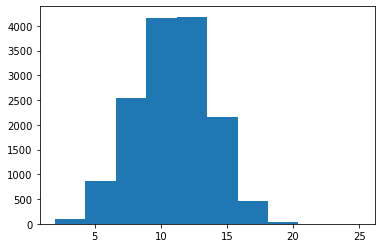

In [19]:
plt.hist(aoa_for_three_syllables);

In [20]:
aoa_for_three_syllables.mean()

10.925175674742873

The mean age of acquisition for words with three syllables is roughly 11 years old.

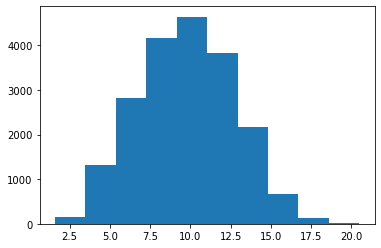

In [23]:
two_syl = df.loc[df['Nsyll'] == 2]
aoa_for_two = two_syl['AoA_Kup_lem']
plt.hist(aoa_for_two);

In [26]:
aoa_for_two.mean()

9.739649846556352

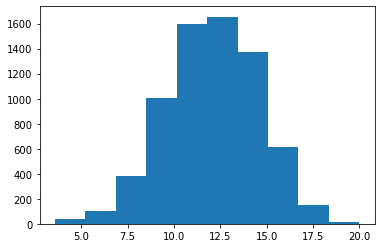

In [27]:
four_syllables = df.loc[df['Nsyll'] == 4]
aoa_for_four = four_syllables['AoA_Kup_lem']
plt.hist(aoa_for_four);

In [29]:
aoa_for_four.mean()

12.074118920479165

It looks like the mean age of acquisition correlates with the number of syllables, but it's over a very small number of years. 